<a href="https://colab.research.google.com/github/Elielichi/IA-OXFORD-course/blob/main/Copy_of_exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning: Logistic Regression

<img src="https://i.ibb.co/b15d4xG/dragon-1.png" alt="Dragon1" width="500"/>

Congratulations on completing your exploration of linear regression! You’ve gained a solid understanding of one of the core techniques in machine learning, including its strengths and limitations.

Next, we’ll dive into classification with logistic regression. While it shares similarities with linear regression, logistic regression is used for binary classification, where each input belongs to one of two classes.

Just as we extended linear regression to polynomial regression, we can apply a similar extension to logistic regression. Here, instead of predicting a continuous output, we model the "log-odds" of an input belonging to a specific category.

The "polynomial trick" also enhances logistic regression. By transforming input features into higher-order terms, we can create more flexible decision boundaries, allowing for curves instead of just straight lines.

Let’s begin our journey into logistic regression and its application in binary classification.

Disclaimer: The cool dragon images were generated using stable diffusion.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png" alt="Regression vs Classification" width="500"/>


### Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Data Generation and Visualization

In [ ]:
# Generating linearly separable data
np.random.seed(0)
N = 1000
#Importante separarlos para la visualizacion, con X[:, 0] y X[:, 1] viaulizar de forma 2D
X = np.random.randn(N, 2) #esta parte es para generar numeros aleatorios de una 2D NumPy array, N es la cantidad de samples y 2 es la dimension el cual es 2D,  N es filas y 2 columnas
# Y is creating a binary label array
#Adds the two features for each sample essentially computing a linear combination.
#then there is a condition, if the sum of the two factor is greater than 0 is TRUE, else id FALSE.
#At last, the astype converts the TRUE to 1 and FALSE to 0.
#the Y gets a 1D array of binary data.
y = (X[:, 0] + X[:, 1] > 0).astype(int) #se convierte a una sola array de 1D de npy.

# Adding noise
noise = np.random.rand(N) < 0.1
y[noise] = 1 - y[noise]  # Flip labels for noisy data points


### Visualizing the data

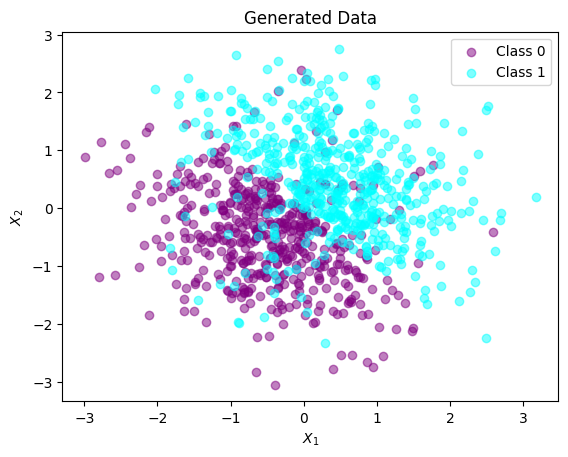

In [ ]:
unique_labels = np.unique(y) #is using NumPy’s "np.unique(x)" function to extract the distinct (eliminate duplicates) values from the array y and it's returned sorted.
color_palette = ['purple', 'cyan']

#the for code below loops through each unique class label in y, finds the corresponding data points in x, and plots them with different colors

for i, label in enumerate(unique_labels):
    class_indices = np.where(y == label)[0]
    plt.scatter(X[class_indices, 0], X[class_indices, 1], label=f'Class {label}', color=color_palette[i], alpha=0.5)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Generated Data')
plt.legend()
plt.show()

In [ ]:
# TODO: Implement the sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
# TODO: Implement the binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Compute the loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [ ]:
# TODO: Predict function. Write the prediction function  sigmoid(w_0 + w_1x)
def predict(X, weights, bias):
  z = np.dot(X, weights) + bias
  return sigmoid(z)

## Binary entropy loss function
$$
L(w_0,w_1,w_2) = -\frac{1}{N}\sum_{i=1}^N y_i \ln\left(\sigma\left(w_2 x_2^i + w_1x_1^i + w_0\right)\right) + (1 - y_i)\ln\left(\left(1 - \sigma~(w_2 x_2^i + w_1x_1^i + w_0)\right)\right)
$$


## Derivatives
$$
\frac{\partial}{w_0}L(w_0,w_1,w_2)  = \frac{1}{N} \sum_i^N (\sigma(w_1x_1^i + w_2x_2^i + w_0) - y_i)\\
\frac{\partial}{w_1}L(w_0,w_1) = \frac{1}{N} \sum_i^N (\sigma(w_1x_1^i + w_2x_2^i + w_0) - y_i)x_1^i\\
\frac{\partial}{w_2}L(w_0,w_1) = \frac{1}{N} \sum_i^N (\sigma(w_1x_1^i + w_2x_2^i + w_0) - y_i)x_2^i
$$

In [ ]:
# TODO: Function to compute gradient
def compute_gradient(X, y, y_pred):
    m, n = X.shape
    error = y_pred - y
    dw = (1 / m) * np.dot(X.T, error)
    db = (1 / m) * np.sum(error)
    return dw, db

In [ ]:
# Training logistic regression using gradient descent
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for _ in range(epochs):
      # TODO: write down here the prediction
      y_pred = predict(X, weights, bias)

      # TODO: write down gradeint function computation
      dw, db = compute_gradient(X, y, y_pred)

      # TODO: update the weights and biases w1 = w1 - learningrate * dw_1 and similary with the bias
      weights -=  learning_rate * dw
      bias -=  learning_rate * db

    return weights, bias

In [ ]:
# Train the model
weights, bias = train_logistic_regression(X, y)

In [ ]:
# Evaluating the model
y_pred = predict(X, weights, bias)
y_pred = (y_pred > 0.5).astype(int)

# TODO: compute the accuracy. The accuracy is measured as the
# TODO: number of of samples predicted correctly. i.e., how many y_pred = y (comparing true label y with prediction)
accuracy = np.mean(y_pred == y)

print(f'Accuracy: {accuracy}')

Accuracy: 0.891


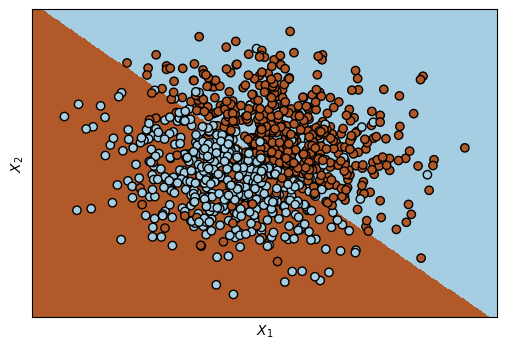

In [ ]:
# Visualizing decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
Z = Z.reshape(xx.shape)
Z = (Z > 0.5).astype(int)

plt.figure(1, figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()